In [1]:
import pandas as pd
import polars as pl
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 150)
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
sns.set()

In [2]:
dates = ['session_start', 'session_end', 'session_date', 'order_dt']
df = pd.read_csv('ecom_go_2.csv', parse_dates=dates)
df_pl = pl.from_pandas(df)

print(df.shape)
print(df.columns.tolist())

(1009, 19)
['user_id', 'region', 'device', 'channel', 'session_start', 'session_end', 'sessiondurationsec', 'session_date', 'month', 'day', 'hour_of_day', 'order_dt', 'revenue', 'payment_type', 'promo_code', 'final_price', 'time_of_day', 'payer', 'week']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1009 non-null   int64         
 1   region              1009 non-null   object        
 2   device              1009 non-null   object        
 3   channel             1009 non-null   object        
 4   session_start       1009 non-null   datetime64[ns]
 5   session_end         1009 non-null   datetime64[ns]
 6   sessiondurationsec  1009 non-null   int64         
 7   session_date        1009 non-null   datetime64[ns]
 8   month               1009 non-null   int64         
 9   day                 1009 non-null   int64         
 10  hour_of_day         1009 non-null   int64         
 11  order_dt            282 non-null    datetime64[ns]
 12  revenue             1009 non-null   int64         
 13  payment_type        282 non-null    object      

In [4]:
df_unchanged = df.copy()
print(df_unchanged.shape, df_unchanged['payer'].sum())

df_replaced = df.copy()
df_replaced['revenue'] = np.where(df_replaced['revenue'] > 9999, 9999, df_replaced['revenue'])
df_replaced['revenue'] = np.where(df_replaced['revenue'] < 4999, 4999, df_replaced['revenue'])
print(df_replaced.shape, df_replaced['payer'].sum())

df_removed = df.copy()
to_remove = df[df['revenue'].isin([1, 100000])].index
df_removed.drop(to_remove, inplace=True)
print(df_removed.shape, df_removed['payer'].sum())


dfs = [df_unchanged, df_replaced, df_removed]

(1009, 19) 282
(1009, 19) 282
(1003, 19) 276


In [5]:
# usa_df = df[(df['region'] == 'United States')]
# france_df = df[(df['region'] == 'France')]
# germany_df = df[(df['region'] == 'Germany')]
# uk_df = df[(df['region'] == 'UK')]

# dfs = [usa_df, france_df, germany_df, uk_df]

# for df in dfs:

# def analyze_trends(df):
#     region_share = df.groupby('region')['payer'].value_counts(normalize=True).unstack().round(3)
#     source_share = df.groupby('channel')['payer'].value_counts(normalize=True).unstack().round(3)
#     device_share = df.groupby('device')['payer'].value_counts(normalize=True).unstack().round(3)
    
#     region_count = df.groupby('region')['payer'].value_counts().unstack()
#     source_count = df.groupby('channel')['payer'].value_counts().unstack()
#     device_count = df.groupby('device')['payer'].value_counts().unstack()

#     results = [region_share, source_share, device_share, region_count, source_count, device_count]

#     for result in results:
#         print(result)
#         print()

# # dfs = [df_unchanged, df_removed]
# # for df_go in dfs:
# #     analyze_trends(df_go)
# #     print('-' * 20)


# channel = ['organic', 'email-рассылки', 'реклама у блогеров', 'социальные сети',  'контекстная реклама', ]
# day = ['night', 'morning', 'day', 'evening']
# df['month'] = pd.Categorical(df['month'], ordered=True, categories=sorted(df['month'].unique()))
# df['day'] = pd.Categorical(df['day'], ordered=True, categories=sorted(df['day'].unique()))
# df['hour_of_day'] = pd.Categorical(df['hour_of_day'], ordered=True, categories=sorted(df['hour_of_day'].unique()))
# df['channel'] = pd.Categorical(df['channel'], ordered=True, categories=channel)
# df['time_of_day'] = pd.Categorical(df['time_of_day'], ordered=True, categories=day)
# df['revenue'] = pd.Categorical(df['revenue'], ordered=True, categories=sorted(df['revenue'].dropna().unique()))

### `Доля продаж по регионам`

In [6]:
def sales_prop_by_region(df):
    grouped = df.groupby('region')['payer'].value_counts(normalize=True).unstack().round(3)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu")
    return grouped
    
dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_prop_by_region(df_go))
    print()

payer              0      1
region                     
France         0.750  0.250
Germany        0.757  0.243
UK             0.709  0.291
United States  0.712  0.288

payer              0      1
region                     
France         0.765  0.235
Germany        0.757  0.243
UK             0.716  0.284
United States  0.716  0.284



### `Доля продаж по источникам`

In [7]:
def sales_prop_by_channel(df):
    grouped = df.groupby('channel')['payer'].value_counts(normalize=True).unstack().round(2)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu")
    return grouped

dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_prop_by_channel(df_go))
    print()

payer                   0     1
channel                        
email-рассылки       0.71  0.29
organic              0.75  0.25
контекстная реклама  0.72  0.28
реклама у блогеров   0.71  0.29
социальные сети      0.70  0.30

payer                   0     1
channel                        
email-рассылки       0.71  0.29
organic              0.75  0.25
контекстная реклама  0.72  0.28
реклама у блогеров   0.73  0.27
социальные сети      0.70  0.30



### `Доля продаж по устройствам`

In [8]:
def sales_prop_by_device(df):
    grouped = df.groupby('device')['payer'].value_counts(normalize=True).unstack().round(2)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu")
    return grouped

dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_prop_by_device(df_go))
    print()

payer       0     1
device             
Android  0.69  0.31
Mac      0.71  0.29
PC       0.75  0.25
iPhone   0.73  0.27

payer       0     1
device             
Android  0.69  0.31
Mac      0.71  0.29
PC       0.76  0.24
iPhone   0.74  0.26



### `Количество пользователей с разбивкой на платящих/не платящих по регионам`

In [9]:
def sales_count_by_region(df):
    grouped = df.groupby('region')['payer'].value_counts().unstack().round(2)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu", fmt='.0f')
    return grouped

dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_count_by_region(df_go))
    print()

payer            0    1
region                 
France          78   26
Germany         78   25
UK              83   34
United States  488  197

payer            0    1
region                 
France          78   24
Germany         78   25
UK              83   33
United States  488  194



### `Количество пользователей с разбивкой на платящих/не платящих по источникам`

In [10]:
def sales_count_by_channel(df):
    grouped = df.groupby('channel')['payer'].value_counts().unstack().round(2)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu", fmt='.0f')
    return grouped

dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_count_by_channel(df_go))
    print()

payer                  0    1
channel                      
email-рассылки        17    7
organic              259   88
контекстная реклама  117   45
реклама у блогеров    72   29
социальные сети      262  113

payer                  0    1
channel                      
email-рассылки        17    7
organic              259   85
контекстная реклама  117   45
реклама у блогеров    72   27
социальные сети      262  112



### `Количество пользователей с разбивкой на платящих/не платящих по устройствам`

In [11]:
def sales_count_by_device(df):
    grouped = df.groupby('device')['payer'].value_counts().unstack().round(2)
    # plt.figure()
    # sns.heatmap(grouped, annot=True, cmap="YlGnBu", fmt='.0f')
    return grouped

dfs = [df_unchanged, df_removed]
for df_go in dfs:
    print(sales_count_by_device(df_go))
    print()

payer      0   1
device          
Android  165  73
Mac      146  61
PC       155  52
iPhone   261  96

payer      0   1
device          
Android  165  73
Mac      146  60
PC       155  49
iPhone   261  94



### `Графики, показывающие есть ли сезонность в продажах по месяцам, дням недели, времени суток`

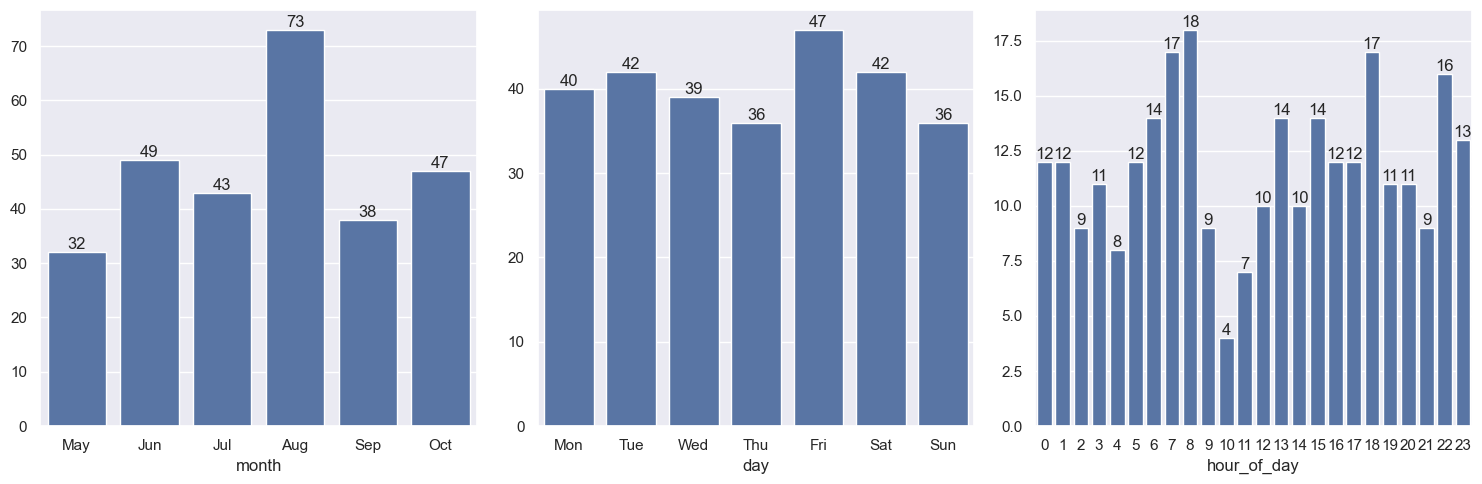

In [12]:
def analyze_time_series(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Monthly
    monthly_sales = df[df['payer']==1]['month'].value_counts().sort_index()
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[0])
    for i, v in enumerate(monthly_sales.values):
       axes[0].text(i, v, str(v), ha='center', va='bottom')
    axes[0].set_xticks(range(len(range(5, 11))))
    axes[0].set_xticklabels(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])
    
    # Weekday
    weekday_sales = df[df['payer']==1]['day'].value_counts().sort_index()
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values, ax=axes[1])
    for i, v in enumerate(weekday_sales.values):
       axes[1].text(i, v, str(v), ha='center', va='bottom')
    axes[1].set_xticks(range(7))
    axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
    # Hourly
    hourly_sales = df[df['payer']==1]['hour_of_day'].value_counts().sort_index()
    sns.barplot(x=hourly_sales.index, y=hourly_sales.values, ax=axes[2])
    for i, v in enumerate(hourly_sales.values):
       axes[2].text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

analyze_time_series(df)

### `Диаграмма количества покупок по типу оплаты`

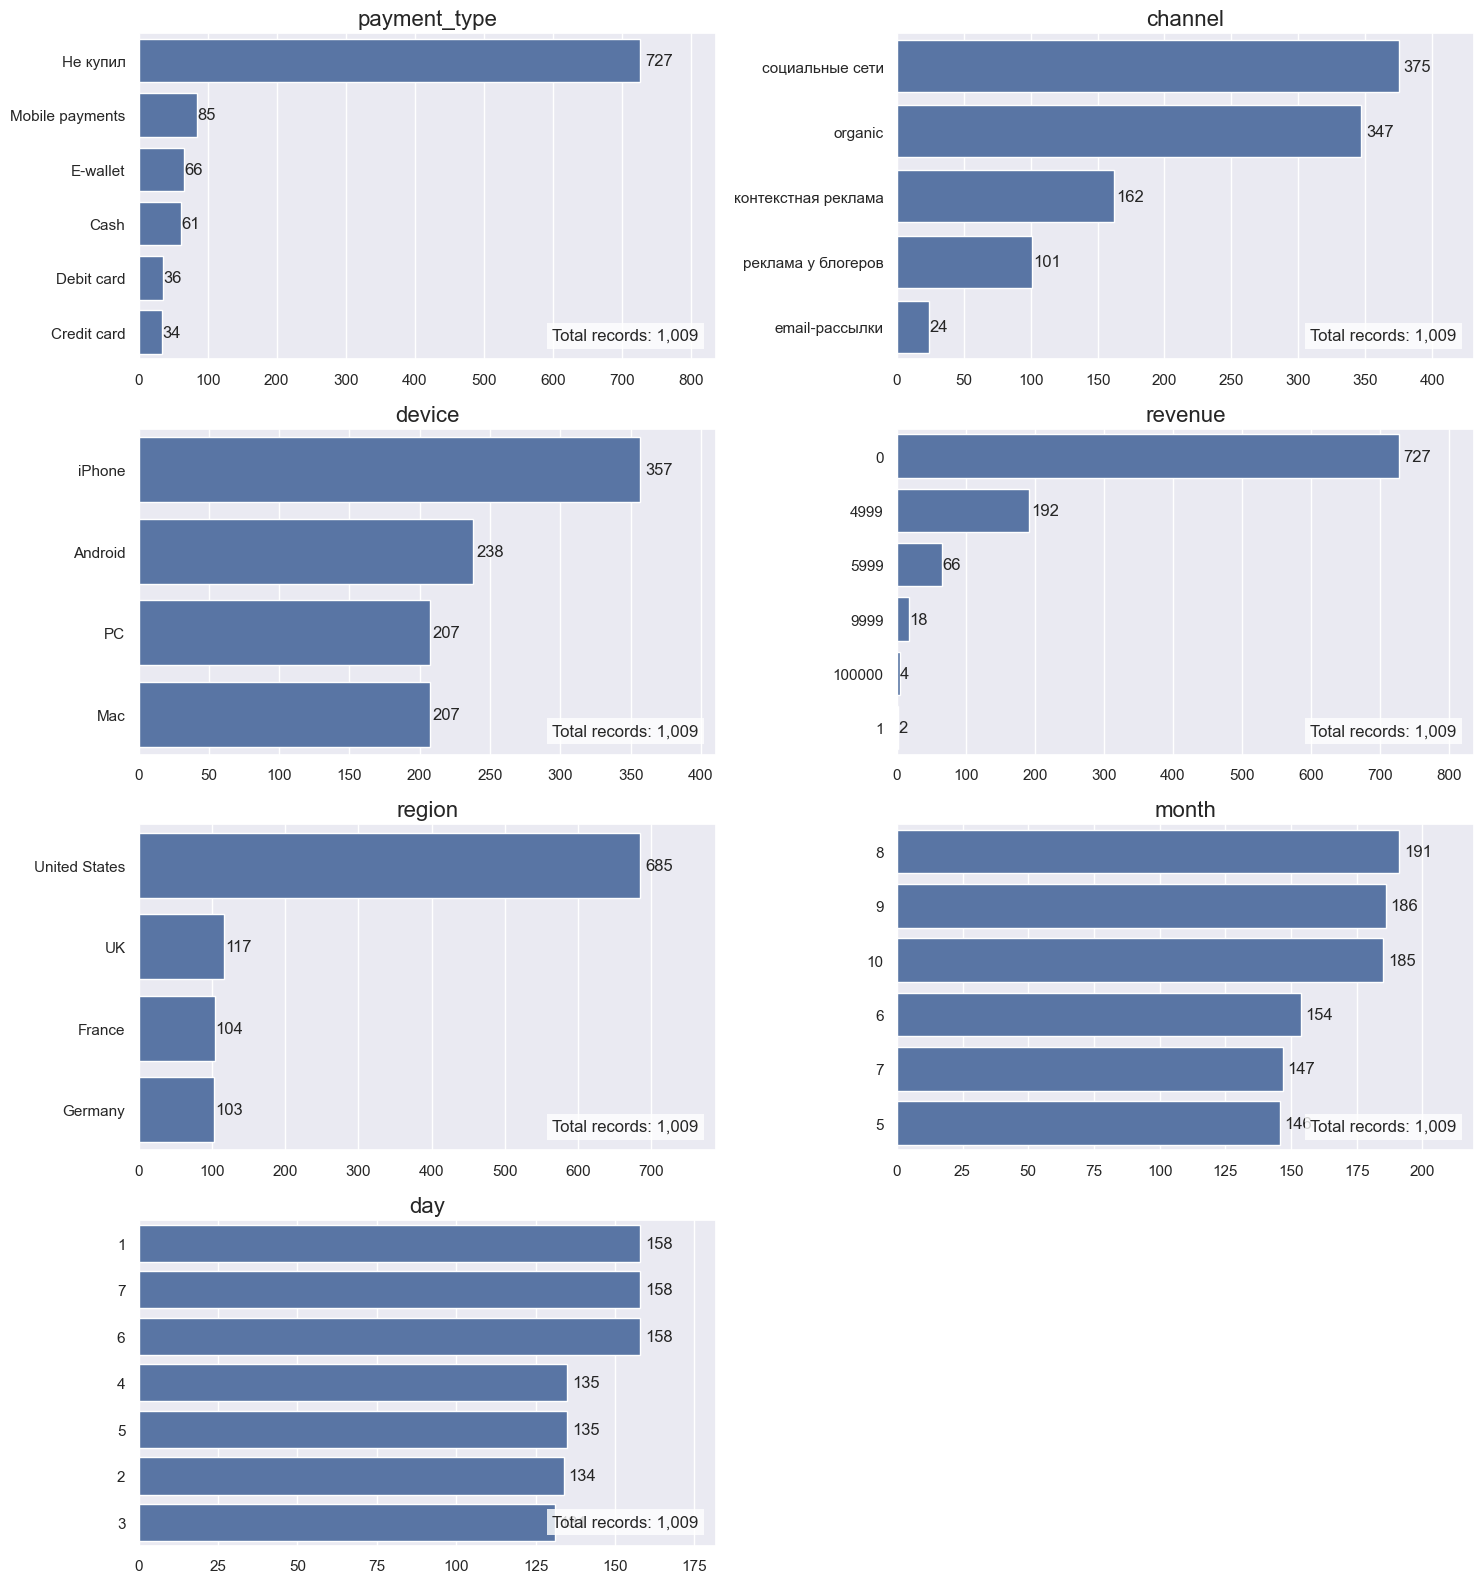

In [14]:
def analyze_distribution(df, factors, dropna=False, normalize=True, paid=False):
    if paid:
        df = df[df['payer'] == 1]
        
    n_rows = int(np.ceil(len(factors) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for pos, factor in enumerate(factors):
        row = pos // 2
        col = pos % 2
        
        if dropna:
            counts = df[factor].value_counts(normalize=normalize)
            total_count = df[factor].count()
        else:
            df_copy = df.copy()
            df_copy[factor] = df_copy[factor].fillna('Не купил')
            counts = df_copy[factor].value_counts(normalize=normalize)
            total_count = df_copy[factor].count()
        
        sns.barplot(y=counts.index, x=counts.values, 
                   ax=axes[row, col], order=counts.index,
                   orient='h')
        
        for i, v in enumerate(counts.values):
            if normalize:
                label = f'{v:.1%}'
            else:
                label = f'{int(v):,}'
            axes[row, col].text(v + (v * 0.01), i, label, 
                              va='center', ha='left')
        
        axes[row, col].set_title(factor, fontsize=16)
        axes[row, col].set_ylabel('')
        axes[row, col].set_xlim(0, max(counts.values) * 1.15)
        axes[row, col].text(0.97, 0.05, 
                          f'Total records: {total_count:,}',
                          transform=axes[row, col].transAxes,
                          ha='right', va='bottom',
                          bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
        axes[n_rows-1, 1].set_visible(False)
    
    plt.tight_layout()
    plt.show()

cols = ['payment_type', 'channel', 'device', 'revenue', 'region', 'month', 'day', 'time_of_day']
analyze_distribution(df, cols, normalize=False)